In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten 
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
import tensorflow as tf
from sklearn.model_selection import train_test_split
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [0]:
train_dataset = np.loadtxt('train.csv', skiprows=1, delimiter=',')

In [0]:
train_dataset[0:5]

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
x_train = train_dataset[:, 1:]
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [0]:
x_train /= 255.0

In [0]:
x_train[1].shape

In [0]:
y_train = train_dataset[:, 0]

In [0]:
y_train[:5]

array([1., 0., 1., 4., 0.])

In [0]:
y_train = utils.to_categorical(y_train)

In [0]:
y_train[:5]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=random_seed)

In [0]:
X_train.shape

(37800, 28, 28, 1)

In [0]:
datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.10,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

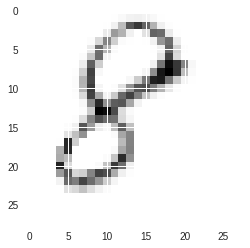

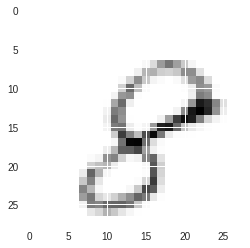

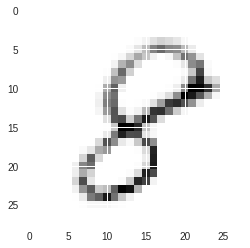

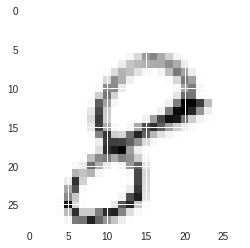

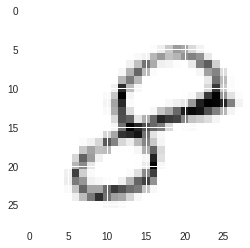

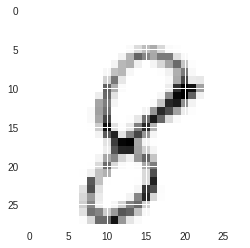

In [0]:
i = 0
data = X_train[0]
data = np.expand_dims(data, axis=0)
for batch in datagen.flow(data, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(batch[0][:,:,0])
    i += 1
    if i % 6 == 0:
        break
plt.show()

In [0]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
__________

In [0]:
сheckpoint = ModelCheckpoint('mnist-cnn.h5', 
                              monitor='val_acc', 
                              save_best_only=True,
                              verbose=1)

In [0]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [0]:
batch_size=96

In [1]:
history = model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size), 
                    epochs=30,
                    validation_data=(X_val, Y_val),
                    steps_per_epoch=X_train.shape[0] // batch_size,
                    verbose=1,
                    callbacks=[сheckpoint, learning_rate_reduction])

NameError: name 'model' is not defined

In [0]:
model.load_weights('mnist-cnn.hdf5')

In [2]:
plt.plot(history.history['acc'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_acc'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

NameError: name 'plt' is not defined

In [0]:
test_dataset = np.loadtxt('test.csv', skiprows=1, delimiter=",")

In [0]:
test_dataset[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
x_test = test_dataset.reshape(test_dataset.shape[0], 28, 28, 1)

In [0]:
x_test = x_test / 255.0

In [0]:
predictions = model.predict(x_test)

In [0]:
predictions[:5]

array([[7.0808330e-19, 1.2293642e-15, 1.0000000e+00, 1.6526332e-13,
        4.8959526e-16, 1.6048716e-18, 1.2838233e-17, 1.1961627e-12,
        7.7564989e-14, 2.3213994e-16],
       [9.9999893e-01, 1.6688695e-12, 6.3178089e-09, 6.3089062e-10,
        7.1604861e-10, 2.8566465e-09, 2.1731910e-07, 2.6650182e-10,
        3.7282078e-07, 4.8097058e-07],
       [2.9786121e-10, 2.6178534e-10, 1.4524261e-07, 1.2859771e-09,
        5.9936187e-06, 1.6657364e-10, 6.1487855e-12, 1.1224843e-08,
        2.0155933e-06, 9.9999177e-01],
       [9.9914634e-01, 1.0904064e-07, 7.0121109e-06, 1.3721834e-05,
        4.1037286e-08, 5.3695007e-06, 3.6620080e-05, 4.0169263e-07,
        2.4500233e-04, 5.4535794e-04],
       [2.5390169e-13, 2.4379212e-11, 6.3516737e-08, 9.9996173e-01,
        3.9227069e-17, 2.6025369e-09, 1.9312415e-11, 3.6186339e-11,
        3.8091617e-05, 5.9398592e-10]], dtype=float32)

In [0]:
predictions = np.argmax(predictions, axis=1)

In [0]:
predictions[:5]

array([2, 0, 9, 0, 3])

In [0]:
out = np.column_stack((range(1, predictions.shape[0]+1), predictions))

In [0]:
out[:5]

array([[1, 2],
       [2, 0],
       [3, 9],
       [4, 0],
       [5, 3]])

In [0]:
np.savetxt('submission.csv', out, header="ImageId,Label", 
            comments="", fmt="%d,%d")